## General Imports

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Load Data, Split Train-Val, and Train Model

For the purpose of this examples we'll use the simple iris dataset and train a random forest model for multiclass classification

In [2]:
iris_df = load_iris(return_X_y=False, as_frame=True)['frame']
label_col = 'target'
df_train, df_val = train_test_split(iris_df, stratify=iris_df[label_col], random_state=0)

In [3]:
rf_clf = RandomForestClassifier()
rf_clf.fit(df_train.drop(label_col, axis=1), df_train[label_col]);

## Define MLChecks Dataset

In [4]:
from deepchecks import Dataset

Initialize the Dataset object, stating the relevant metadata about the dataset (e.g. the name for the label column) <br>
Check out the Dataset's attributes to see which additional special columns can be declared and used (e.g. index, date).

In [5]:
# We explicitly state that this dataset has no categorical features, otherwise they will be automatically inferred

ds_train = Dataset(df_train, label = label_col)
ds_val =  Dataset(df_val, label = label_col)

## Run Overall Generic Check Suite

In [6]:
from deepchecks.suites import OverallGenericCheckSuite


Overall Generic Suite

Checks Summary

With Conditions

Status,Check,Condition,More Info
✓,Mixed Nulls - Train Dataset,Not more than 1 different null types for all columns,
✓,Mixed Nulls - Validation Dataset,Not more than 1 different null types for all columns,
✓,Mixed Types - Train Dataset,Rare type ratio is not less than 1.00% of samples in all columns,
✓,Mixed Types - Validation Dataset,Rare type ratio is not less than 1.00% of samples in all columns,
✓,String Mismatch - Train Dataset,No string variants for all columns,
✓,String Mismatch - Validation Dataset,No string variants for all columns,
✓,String Mismatch Comparison,No new variants allowed in validation data for all columns,


Without Conditions

Check,Has Display?
Single Value in Column - Train Dataset,No
Single Value in Column - Validation Dataset,No
Data Duplicates - Train Dataset,No
Data Duplicates - Validation Dataset,No
Rare Format Detection - Train Dataset,No
Rare Format Detection - Validation Dataset,No
Special Characters - Train Dataset,No
Special Characters - Validation Dataset,No
Category Mismatch Train Validation,No
Data Sample Leakage Report,Yes


Results Display

Checks without Condition

Data Sample Leakage Report

Detect samples in the validation data that appear also in training data.

2.63% (1.0 / 38) of validation data samples appear in train data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
Validation indices: 142,5.800000,2.700000,5.100000,1.900000,2
Train indices: 101,5.800000,2.700000,5.100000,1.900000,2


Single Feature Contribution - Train Dataset

Return the PPS (Predictive Power Score) of all features in relation to the label.

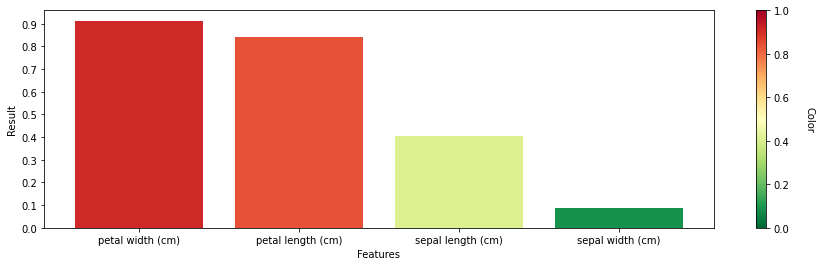

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

Single Feature Contribution - Validation Dataset

Return the PPS (Predictive Power Score) of all features in relation to the label.

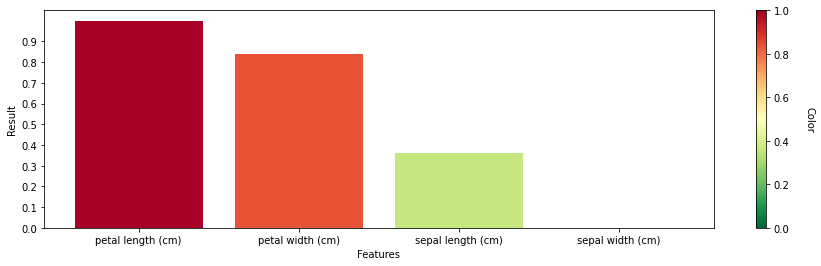

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

Single Feature Contribution Train-Validation

Return the difference in PPS (Predictive Power Score) of all features between train and validation datasets.

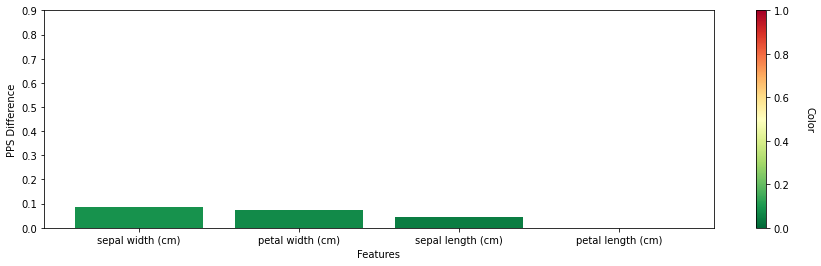

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

When we compare train PPS to validation PPS, A high difference can strongly indicate leakage, as a feature

that was powerful in train but not in validation can be explained by leakage in train that is not relevant to a new dataset.

Train Validation Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on validation data.

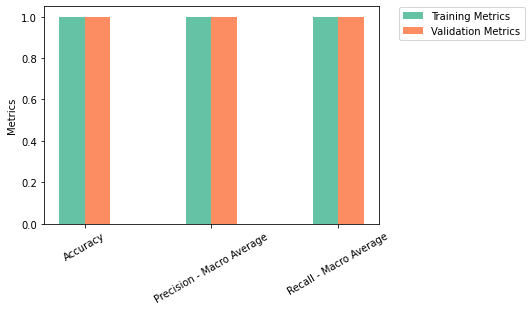

Performance Report - Train Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,1.000000
Precision - Macro Average,1.000000
Recall - Macro Average,1.000000


Performance Report - Validation Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,1.000000
Precision - Macro Average,1.000000
Recall - Macro Average,1.000000


Naive Model Comparison

Compare naive model score to given model score.

The naive model is 0.34 times as effective as the checked model using the Accuracy metric. RandomForestClassifier model prediction has achieved 1 compared to Naive statistical prediction which achieved 0.34 on tested data.

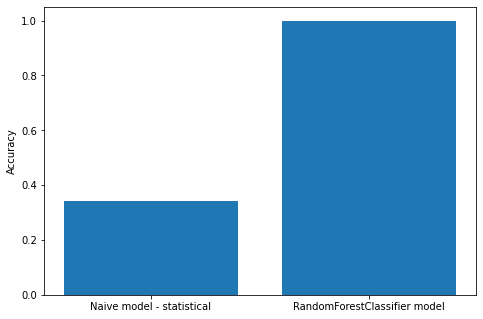

In [7]:
OverallGenericCheckSuite.run(train_dataset=ds_train, validation_dataset=ds_val, model=rf_clf, check_datasets_policy='both')

## Let's see what would've happened with a different train-val split:

In [8]:
train_len = round(0.67*iris_df.shape[0])
alternative_train_df = Dataset(iris_df[:train_len], label = label_col)
alternative_val_df = Dataset(iris_df[train_len:], label = label_col)

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.


Overall Generic Suite

Checks Summary

With Conditions

Status,Check,Condition,More Info
✓,Mixed Nulls - Train Dataset,Not more than 1 different null types for all columns,
✓,Mixed Nulls - Validation Dataset,Not more than 1 different null types for all columns,
✓,Mixed Types - Train Dataset,Rare type ratio is not less than 1.00% of samples in all columns,
✓,Mixed Types - Validation Dataset,Rare type ratio is not less than 1.00% of samples in all columns,
✓,String Mismatch - Train Dataset,No string variants for all columns,
✓,String Mismatch - Validation Dataset,No string variants for all columns,
✓,String Mismatch Comparison,No new variants allowed in validation data for all columns,


Without Conditions

Check,Has Display?
Single Value in Column - Train Dataset,No
Single Value in Column - Validation Dataset,Yes
Data Duplicates - Train Dataset,No
Data Duplicates - Validation Dataset,Yes
Rare Format Detection - Train Dataset,No
Rare Format Detection - Validation Dataset,No
Special Characters - Train Dataset,No
Special Characters - Validation Dataset,No
Category Mismatch Train Validation,No
Data Sample Leakage Report,No


Results Display

Checks without Condition

Single Value in Column - Validation Dataset

Check if there are columns which have only a single unique value in all rows.

The following columns have only one unique value

,target
Single unique value,2


Data Duplicates - Validation Dataset

Search for duplicate data in dataset.

2.00% of data samples are duplicates

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
Number of Duplicates,,,,,
2,5.800000,2.700000,5.100000,1.900000,2


Single Feature Contribution - Train Dataset

Return the PPS (Predictive Power Score) of all features in relation to the label.

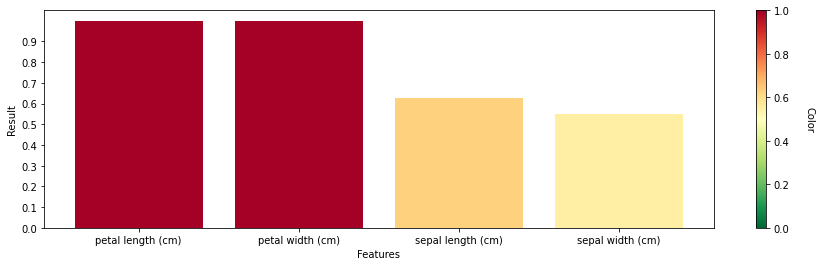

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

Single Feature Contribution - Validation Dataset

Return the PPS (Predictive Power Score) of all features in relation to the label.

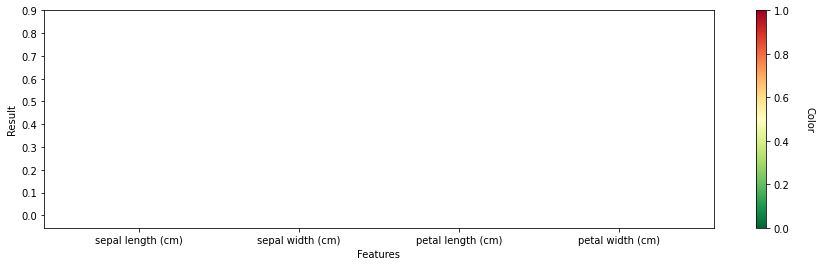

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

Single Feature Contribution Train-Validation

Return the difference in PPS (Predictive Power Score) of all features between train and validation datasets.

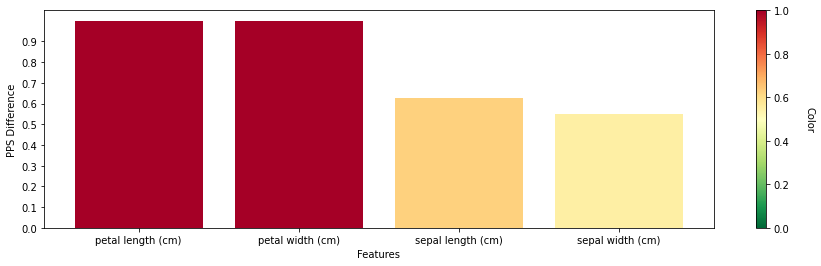

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

When we compare train PPS to validation PPS, A high difference can strongly indicate leakage, as a feature

that was powerful in train but not in validation can be explained by leakage in train that is not relevant to a new dataset.

Train Validation Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on validation data.

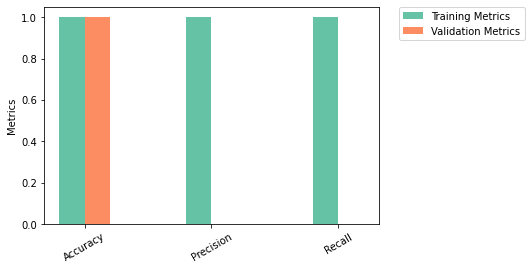

Performance Report - Train Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,1.000000
Precision,1.000000
Recall,1.000000


Performance Report - Validation Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,1.000000
Precision,0.000000
Recall,0.000000


Naive Model Comparison

Compare naive model score to given model score.

The naive model is 0 times as effective as the checked model using the Accuracy metric. RandomForestClassifier model prediction has achieved 1 compared to Naive statistical prediction which achieved 0 on tested data.

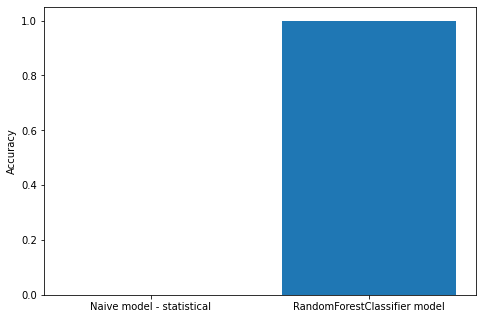

In [9]:
OverallGenericCheckSuite.run(train_dataset=alternative_train_df, validation_dataset=alternative_val_df,
                             model=rf_clf, check_datasets_policy='both')

##### Note that we found:
1. Validation Dataset 'target' column, which is the label column, had only one single unique value! This indicates something that's worth noticing (validation data is different than the training data and has only a single type of labels in samples...)
2. Validation dataset had a duplicate sample (which might be fine, use-case dependent). If not relevant, this check can be removed from suite.

## Create Custom CheckSuite

In [10]:
from deepchecks import CheckSuite
from deepchecks.checks import *

In [11]:
# check out which builtin performance checks exist
print([class_name for class_name in dir(performance) if class_name[0].isupper()])

['CalibrationMetric', 'ConfusionMatrixReport', 'NaiveModelComparison', 'PerformanceReport', 'RocReport', 'SegmentPerformance']


In [12]:
MyModelSuite = CheckSuite('Simple Suite For Model Performance',
    ModelInfo(),
    PerformanceReport(),
    TrainValidationDifferenceOverfit(),
    ConfusionMatrixReport(),
    NaiveModelComparison(),
    NaiveModelComparison(naive_model_type='statistical')
)

Simple Suite For Model Performance

Checks Summary

Without Conditions

Check,Has Display?
Model Info,Yes
Performance Report - Train Dataset,Yes
Performance Report - Validation Dataset,Yes
Train Validation Difference Overfit,Yes
Confusion Matrix Report - Train Dataset,Yes
Confusion Matrix Report - Validation Dataset,Yes
Naive Model Comparison,Yes
Naive Model Comparison,Yes


Results Display

Checks without Condition

Model Info

Summarize given model parameters.

Model Type: RandomForestClassifier

,parameter,value
0,bootstrap,True
1,ccp_alpha,0.000000
2,class_weight,None
3,criterion,gini
4,max_depth,None
5,max_features,auto
6,max_leaf_nodes,None
7,max_samples,None
8,min_impurity_decrease,0.000000
9,min_samples_leaf,1


Performance Report - Train Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,1.000000
Precision - Macro Average,1.000000
Recall - Macro Average,1.000000


Performance Report - Validation Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,1.000000
Precision - Macro Average,1.000000
Recall - Macro Average,1.000000


Train Validation Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on validation data.

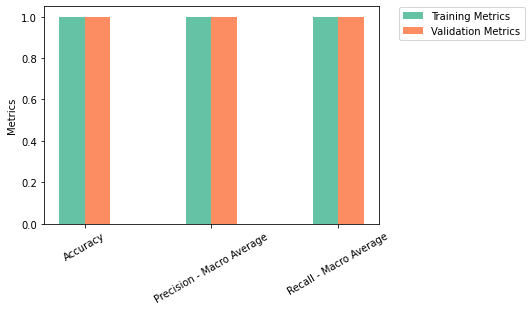

Confusion Matrix Report - Train Dataset

Return the confusion_matrix.

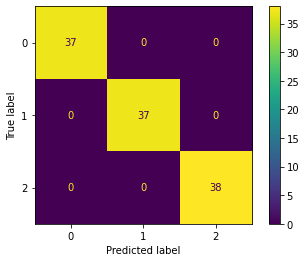

Confusion Matrix Report - Validation Dataset

Return the confusion_matrix.

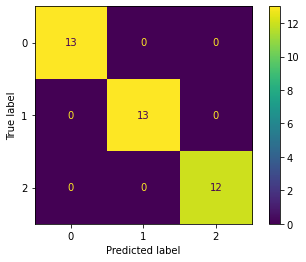

Naive Model Comparison

Compare naive model score to given model score.

The naive model is 0.34 times as effective as the checked model using the Accuracy metric. RandomForestClassifier model prediction has achieved 1 compared to Naive statistical prediction which achieved 0.34 on tested data.

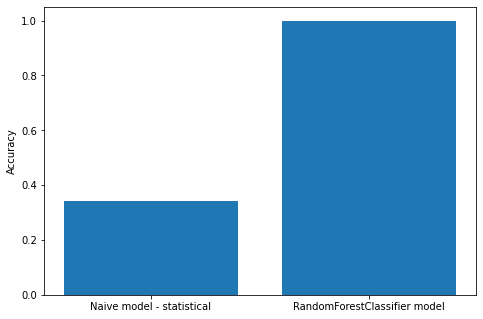

Naive Model Comparison

Compare naive model score to given model score.

The naive model is 0.34 times as effective as the checked model using the Accuracy metric. RandomForestClassifier model prediction has achieved 1 compared to Naive statistical prediction which achieved 0.34 on tested data.

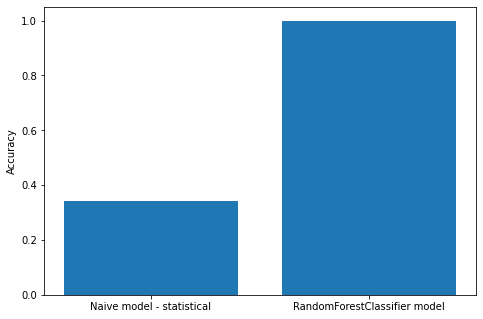

In [13]:
MyModelSuite.run(model=rf_clf, train_dataset=ds_train, validation_dataset=ds_val, check_datasets_policy='both')